In [16]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Binarizer
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

In [17]:
df = pd.read_csv("store_with_consumers.csv")
df.head()

,reps,product,qty,revenue,region,consumers
0,Chitra,Galaxy,2,155.10,West,largest_reps
1,Vijay,Jet,2,39.30,North,reps_minors
2,Mala,Beacon,3,74.25,West,largest_reps
3,Suman,Alpen,3,100.98,North,largest_reps
4,Rachna,Orbit,2,44.98,North,reps_minors


In [25]:
# Variável alvo
y = df["consumers"]

# Variáveis de entrada
X = df[["product", "qty", "revenue", "region", "reps"]]

In [26]:
# Exibe as primeiras 5 linhas das features e da variável alvo para verificação
print("--- Features (y) ---")
print(y.head())
print("\n--- Variável Alvo (X) ---")

--- Features (y) ---
0    largest_reps
1     reps_minors
2    largest_reps
3    largest_reps
4     reps_minors
Name: consumers, dtype: object

--- Variável Alvo (X) ---


In [28]:
# Exibe as dimensões dos dataframes resultantes
print(f"\nDimensões de X: {X.shape}")
print(f"Dimensões de y: {y.shape}")


Dimensões de X: (10000, 5)
Dimensões de y: (10000,)


In [29]:
# Pré-processamento
# One-hot encoding para variáveis categóricas
X = pd.get_dummies(X, columns=["product", "region", "reps"])

# Binarizar variáveis numéricas (usando mediana como limiar)
bin_qty = Binarizer(threshold=X["qty"].median())
bin_rev = Binarizer(threshold=X["revenue"].median())

X["qty"] = bin_qty.fit_transform(X[["qty"]])
X["revenue"] = bin_rev.fit_transform(X[["revenue"]])

In [30]:
# Dividir treino e teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [31]:
# Treinar modelo BernoulliNB
model = BernoulliNB()
model.fit(X_train, y_train)

,alpha,1.0
,force_alpha,True
,binarize,0.0
,fit_prior,True
,class_prior,None


In [33]:
# 7. Avaliar modelo
y_pred = model.predict(X_test)
print("Acurácia:", accuracy_score(y_test, y_pred))
print("\nRelatório de classificação:\n", classification_report(y_test, y_pred))

Acurácia: 1.0

Relatório de classificação:
               precision    recall  f1-score   support

largest_reps       1.00      1.00      1.00      1530
 reps_minors       1.00      1.00      1.00      1470

    accuracy                           1.00      3000
   macro avg       1.00      1.00      1.00      3000
weighted avg       1.00      1.00      1.00      3000



Esse resultado indica um desempenho perfeito do modelo de machine learning, o que é um cenário ideal (e raro) em problemas de classificação.

Vamos analisar cada métrica:

#### Acurácia: 1.0
A acurácia de 1.0 significa que o modelo acertou 100% das suas previsões. De um total de 3000 amostras (1530 de largest_reps e 1470 de reps_minors), ele classificou corretamente todas elas.

Relatório de classificação
Esse relatório fornece uma análise mais detalhada do desempenho para cada classe (largest_reps e reps_minors).

**Precision (Precisão)**: Para ambas as classes, a precisão é 1.0. Isso quer dizer que, de todas as vezes que o modelo previu uma classe, ele estava 100% certo. Não houve falsos positivos.

**Recall (Revocação/Sensibilidade)**: Para ambas as classes, o recall também é 1.0. Isso significa que o modelo conseguiu identificar 100% de todas as amostras que realmente pertenciam a cada classe. Não houve falsos negativos.

**F1-Score**: O F1-Score é a média harmônica da precisão e do recall. Como ambos são 1.0, o F1-Score também é 1.0. É uma métrica útil para ter um único valor que equilibra precisão e recall.

**Support (Suporte)**: Indica o número de amostras reais (não as previstas) para cada classe.

largest_reps: 1530 amostras.

reps_minors: 1470 amostras.

Resumo
De forma geral, esse relatório mostra que o modelo conseguiu classificar perfeitamente as 3000 amostras, sem cometer nenhum erro. Ele previu corretamente a classe largest_reps para as 1530 amostras dessa classe e a classe reps_minors para as 1470 amostras.

Esse tipo de resultado perfeito é comum quando se treina um modelo com dados que não são complexos ou quando a separação entre as classes é muito clara. No mundo real, resultados com precisão e recall de 1.0 em um conjunto de dados de teste/validação podem indicar um problema de overfitting (o modelo decorou os dados de treinamento em vez de aprender a generalizar), então é sempre bom verificar se esse modelo se sairia tão bem com dados novos e não vistos.


### ======= Adicionando novos dados para teste =========

In [34]:
# 8. Exemplo de previsão
novo_exemplo = pd.DataFrame({
    "product": ["Galaxy"],
    "qty": [3],
    "revenue": [120],
    "region": ["West"],
    "reps": ["Chitra"]
})

# Aplicar as mesmas transformações do X
novo_exemplo = pd.get_dummies(novo_exemplo)
novo_exemplo = novo_exemplo.reindex(columns=X.columns, fill_value=0)
novo_exemplo["qty"] = bin_qty.transform(novo_exemplo[["qty"]])
novo_exemplo["revenue"] = bin_rev.transform(novo_exemplo[["revenue"]])

In [35]:
print("\nPrevisão para novo exemplo:", model.predict(novo_exemplo)[0])


Previsão para novo exemplo: largest_reps


### ========== Análise exploratoria ============

In [ ]:
# Pegar nomes das features
features = X.columns

# Probabilidade log dos atributos por classe
log_probs = model.feature_log_prob_

# Mostrar top features que diferenciam cada grupo
for i, class_label in enumerate(model.classes_):
    top_features = np.argsort(log_probs[i])[-5:]
    print(f"\nSegmento: {class_label}")
    for j in top_features:
        print(f" - {features[j]} => {log_probs[i][j]:.2f}")


Segmento: largest_reps
 - product_Alpen => -1.42
 - region_West => -1.17
 - region_North => -1.05
 - qty => -0.21
 - revenue => -0.00

Segmento: reps_minors
 - product_Jet => -1.81
 - region_South => -1.79
 - region_East => -1.73
 - region_West => -1.21
 - region_North => -1.03


In [14]:
# Filtrar apenas os maiores representantes
largest = df[df["consumers"] == "largest_reps"]

# Agrupar por reps e região
grouped = (largest.groupby(["reps", "region"])
           .agg(total_revenue=("revenue", "sum"),
                total_qty=("qty", "sum"),
                num_sales=("revenue", "count"))
           .reset_index())

# Ordenar pelo maior total de receita
grouped = grouped.sort_values(by="total_revenue", ascending=False)

print(grouped)

       reps region  total_revenue  total_qty  num_sales
56     Seet  South       29577.42       1078        184
53  Santosh   West       23947.69        806        162
0      Aash   East       23895.68        872        146
58  Shaanth  North       22530.39        837        145
48     Ravi  North       22494.18        861        140
..      ...    ...            ...        ...        ...
21    Kamat  North        4533.40        156         40
45      Ram   East        4295.56        167         42
5    Anusha   East        4004.69        147         33
51   Rohini  North        3836.59        147         34
67   Veeyes  North        3693.23        123         39

[72 rows x 5 columns]


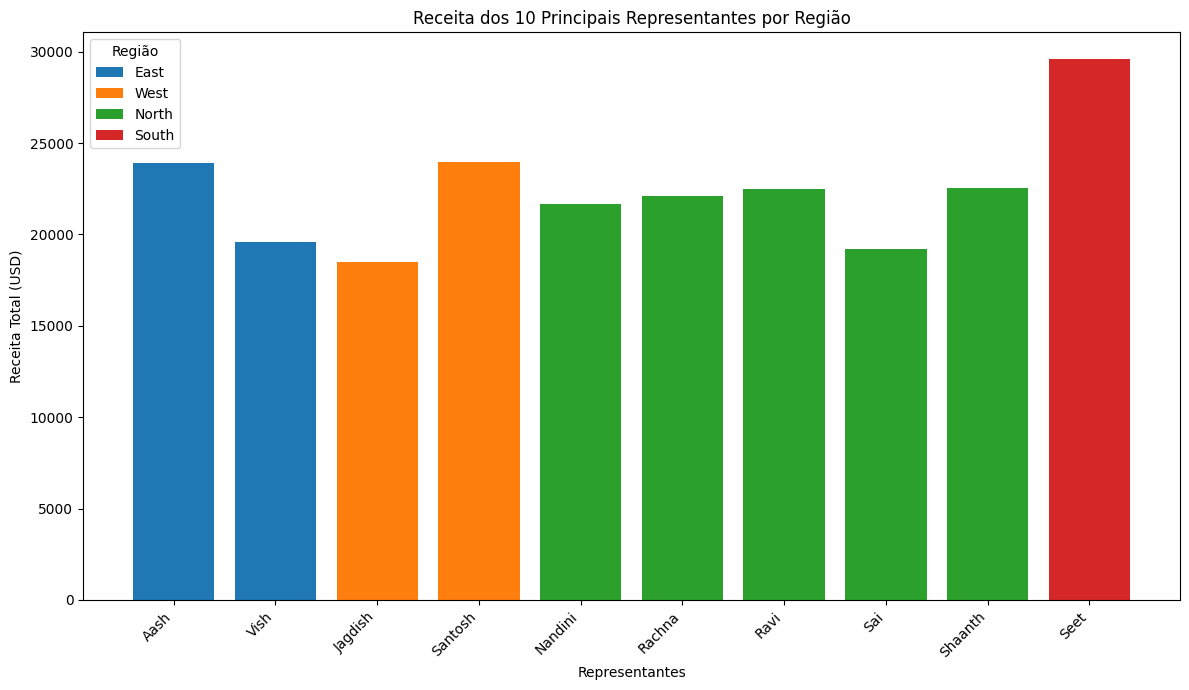

In [37]:
# 1. Filtrar apenas os maiores representantes
largest = df[df["consumers"] == "largest_reps"]

# 2. Agrupar receita por reps e somar
# Este passo é crucial para encontrar os maiores representantes com base na receita total
reps_total_revenue = largest.groupby("reps")["revenue"].sum().reset_index()

# 3. Filtrar para os 10 maiores representantes
# Usamos nlargest() para obter os top 10 com maior receita
top_10_reps = reps_total_revenue.nlargest(10, "revenue")["reps"]

# 4. Agrupar a receita por reps e região, mas agora apenas para os 10 maiores representantes
grouped = (largest[largest["reps"].isin(top_10_reps)]
               .groupby(["reps", "region"])
               .agg(total_revenue=("revenue", "sum"))
               .reset_index())

# 5. Plotar o gráfico de barras
plt.figure(figsize=(12, 7))
for region in grouped["region"].unique():
    subset = grouped[grouped["region"] == region]
    plt.bar(subset["reps"], subset["total_revenue"], label=region)

plt.title("Receita dos 10 Principais Representantes por Região")
plt.xlabel("Representantes")
plt.ylabel("Receita Total (USD)")
plt.legend(title="Região")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()